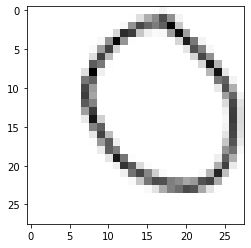

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "dataset"

CATEGORIES = ["dataset_circle", "dataset_square", "dataset_triangle", "dataset_rectangle"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
%matplotlib inline

In [5]:
print(img_array)

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 245
  254 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 254 230 189 161 113
  166 245 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 249 169 108 131 150 127
   55 210 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 223  86 100 209 243 251 248
  174  59 178 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 249 168  56 170 253 255 255 255 255
  255 222  74 147 245 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 251 177 104 220 255 255 255 255 255 255
  255 255 234 116 155 248 255 255 255 255]
 [255 255 255 255 255 255 255 255 228 103 202 254 255 255 255 255 255 255
  255 255 255 222 108 165 255 255 255 255]
 [255 255 255 255 255 255 255 255 125 147 252 255 255 255 255 255 255 255
  255 255 255 254 222  65 195 255 255 255]
 [255 255 255 255 255 255 255 229  51 242 255 255 255 255 255 25

In [6]:
print(img_array.shape)

(28, 28)


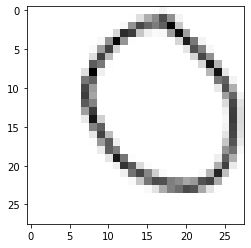

In [7]:
IMG_SIZE = 28

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

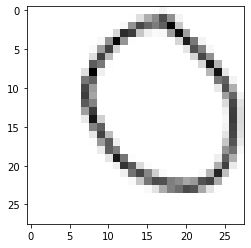

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 20/20 [00:00<00:00, 5022.52it/s]

353


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
3
0
0
2
3
3
0
0


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [254]
   [242]
   [233]
   [225]
   [254]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [255]
   [194]
   [ 68]
   [ 30]
   [ 39]
   [230]
   [255]
   [255]
   [255]
   [255]
   [255]
   [

In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)